In [2]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from remove_shadow import process_image_file

In [3]:
path = "C:/SWdacon/minseo/data/"
csv_file = path+'train.csv'
train_img_path = path+'train_img/'

In [4]:
# RLE 디코딩 함수
def rle_decode(mask_rle, shape):
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape)

In [5]:
csv = pd.read_csv(csv_file)

In [21]:
img_num = 64

### generate mask image

In [24]:
mask_rle = csv.iloc[img_num, 2]
image_path = csv.iloc[img_num, 1]
image = cv2.imread(path+ image_path[2:])
mask = rle_decode(mask_rle, (image.shape[0], image.shape[1]))
x,y=100,100
image = image[y:y+224,x:x+224]
mask = mask[y:y+224,x:x+224]

In [ ]:
image = process_image_file(image)

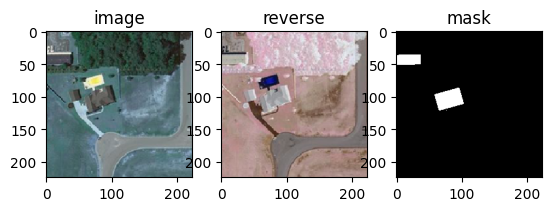

In [25]:
fig = plt.figure()
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(image)
ax1.set_title('image')
ax3 = fig.add_subplot(1,3,2)
ax3.imshow(255-image)
ax3.set_title('reverse')
ax2 = fig.add_subplot(1,3,3)
ax2.imshow(mask,cmap='gray')
ax2.set_title('mask')
plt.show()

In [16]:
rgb_planes = cv2.split(image)

result_planes = []
result_norm_planes = []
for plane in rgb_planes:
    dilated_img = cv2.dilate(plane, np.ones((7,7), np.uint8))
    bg_img = cv2.medianBlur(dilated_img, 21)
    diff_img = 255 - cv2.absdiff(plane, bg_img)
    norm_img = cv2.normalize(diff_img,None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
    result_planes.append(diff_img)
    result_norm_planes.append(norm_img)
    
result = cv2.merge(result_planes)
result_norm = cv2.merge(result_norm_planes)


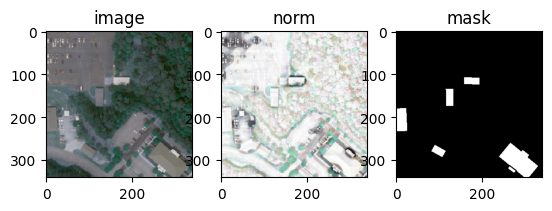

In [17]:
fig = plt.figure()
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(image)
ax1.set_title('image')
ax2 = fig.add_subplot(1,3,2)
ax2.imshow(result_norm)
ax2.set_title('norm')
ax2 = fig.add_subplot(1,3,3)
ax2.imshow(mask,cmap='gray')
ax2.set_title('mask')
plt.show()